In [13]:
import os
print(os.getcwd())


/workspaces/suicidio/Notebook


#  TRABAJO FINAL DE ANÁLISIS PREDICTIVO
###  Predicción del rango de edad en suicidios (Colombia, 2015–2023)



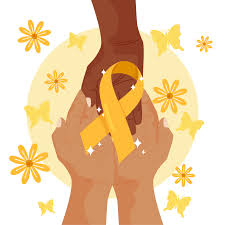

In [14]:
from IPython.display import Image
Image('/workspaces/suicidio/Banco imagenes/suici.jpg')

## Objetivo del Proyecto ##
Desarrollar un modelo de análisis predictivo basado en aprendizaje automático que permita predecir el grupo de edad de las víctimas de suicidio en Colombia, a partir de variables socio-demográficas como el sexo, estado civil, escolaridad, ciclo vital y causa probable del suicidio, con el fin de identificar patrones relevantes que puedan apoyar estrategias de prevención diferenciadas según la etapa de la vida.



## Problema elegido:

Predecir el grupo de edad de una víctima de suicidio en Colombia con base en factores personales y sociales como estado civil, escolaridad, sexo, razón del suicidio, entre otros.

## Justificación:

El análisis por rangos de edad nos permite detectar qué características están más relacionadas con el suicidio en diferentes etapas de la vida.

## Exploración y Preparación de Datos
# Fuente de datos

Datos oficiales del Instituto Nacional de Medicina Legal y Ciencias Forenses: Suicidios en Colombia entre 2015 y 2023.

# Variable objetivo:

Grupo de edad de la víctima

# Variables predictoras candidatas:
- Sexo de la víctima
- Estado civil
- Escolaridad
- Ciclo vital
- Razón del suicidio
- Año del hecho

### Paso 1: Importar librerías

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

### Paso 2: Cargar el conjunto de datos

In [17]:

df = pd.read_csv('/workspaces/suicidio/Datos/Presuntos_Suicidios._Colombia.csv', sep=';')
df.head()

,ID,Año del hecho,Grupo Mayor Menor de Edad,Ciclo Vital,Sexo,Estado Civil,País de Nacimiento,Escolaridad,Pertenencia Grupal,Mes,...,Código Dane Municipio,Municipio,Departamento,Código,Escenario,Zona,Mecanismo Causal,Diagnostico Topográfico de la Lesión,Razón del Suicidio,Ancestro Racial
0,1,2015,b) Mayores de Edad (>18 años),(18 a 28) Juventud,Mujer,Soltero(a),Colombia,Educación inicial y educación preescolar,Grupos étnicos,Enero,...,66572,Pueblo Rico,Risaralda,66,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Indigena
1,2,2015,b) Mayores de Edad (>18 años),(18 a 28) Juventud,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,Ninguno,Enero,...,81001,Arauca,Arauca,81,Vivienda,Parte rural (vereda y campo),Generadores de asfixia,Trauma de cuello,Conflicto con pareja o ex pareja,Mestizo
2,3,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Unión libre,Colombia,Educación inicial y educación preescolar,Campesinos (as) y/o trabajadores (as) del campo,Enero,...,81220,Cravo Norte,Arauca,81,Zonas de Actividades Agropecuarias,Parte rural (vereda y campo),Tóxico,Politraumatismo,Conflicto con pareja o ex pareja,Mestizo
3,4,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,Ninguno,Enero,...,63470,Montenegro,Quindío,63,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Mestizo
4,5,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación media o secundaria alta,Ninguno,Enero,...,63130,Calarca,Quindío,63,Zonas de Actividades Agropecuarias,Parte rural (vereda y campo),Tóxico,Politraumatismo,Sin información,Mestizo


### Paso 3: Revisar estructura del dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23544 entries, 0 to 23543
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   ID                                    23544 non-null  int64 
 1   Año del hecho                         23544 non-null  int64 
 2   Grupo Mayor Menor de Edad             23544 non-null  object
 3   Ciclo Vital                           23544 non-null  object
 4   Sexo                                  23544 non-null  object
 5   Estado Civil                          23544 non-null  object
 6   País de Nacimiento                    23544 non-null  object
 7   Escolaridad                           23544 non-null  object
 8   Pertenencia Grupal                    23544 non-null  object
 9   Mes                                   23544 non-null  object
 10  Dia                                   23544 non-null  object
 11  Código Dane Municipio       

### Paso 4: Descripción estadística general

In [19]:
df.describe(include='all')

,ID,Año del hecho,Grupo Mayor Menor de Edad,Ciclo Vital,Sexo,Estado Civil,País de Nacimiento,Escolaridad,Pertenencia Grupal,Mes,...,Código Dane Municipio,Municipio,Departamento,Código,Escenario,Zona,Mecanismo Causal,Diagnostico Topográfico de la Lesión,Razón del Suicidio,Ancestro Racial
count,23544.000000,23544.000000,23544,23544,23544,23544,23544,23544,23544,23544,...,23544.000000,23544,23544,23544.000000,23544,23544,23544,23544,23544,23544
unique,NaN,NaN,2,6,2,7,34,12,27,13,...,NaN,978,34,NaN,51,4,14,12,21,8
top,NaN,NaN,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación básica primaria,Ninguno,Mayo,...,NaN,"Bogotá, D.C.",Antioquia,NaN,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Mestizo
freq,NaN,NaN,21041,10258,18928,11115,22973,6291,17026,2076,...,NaN,3373,3913,NaN,17380,17466,15410,14471,12444,19524
mean,11772.500000,2019.271577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34914.394113,NaN,NaN,34.811629,NaN,NaN,NaN,NaN,NaN,NaN
std,6796.711705,2.574016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27684.056279,NaN,NaN,29.716454,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,5886.750000,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11001.000000,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,11772.500000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23182.000000,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,17658.250000,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66001.000000,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Visualización exploratoria
A continuación veremos algunas formas básicas de visualizar nuestros datos.

### Gráfico 1: Distribución por Género

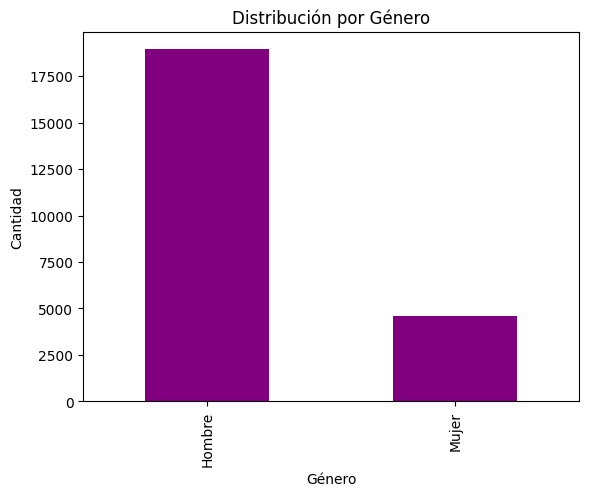

In [21]:
df['Sexo'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

*Este gráfico muestra los grupos de edad más afectados. Se espera observar mayor frecuencia entre jóvenes adultos y adultos medios (ej. 20–39 años).*

Es esencial visualizar la variable objetivo del modelo. Nos ayuda a entender si hay desequilibrio de clases, lo cual impacta en la calidad del modelo predictivo.

### Gráfico 2: Histograma de edades

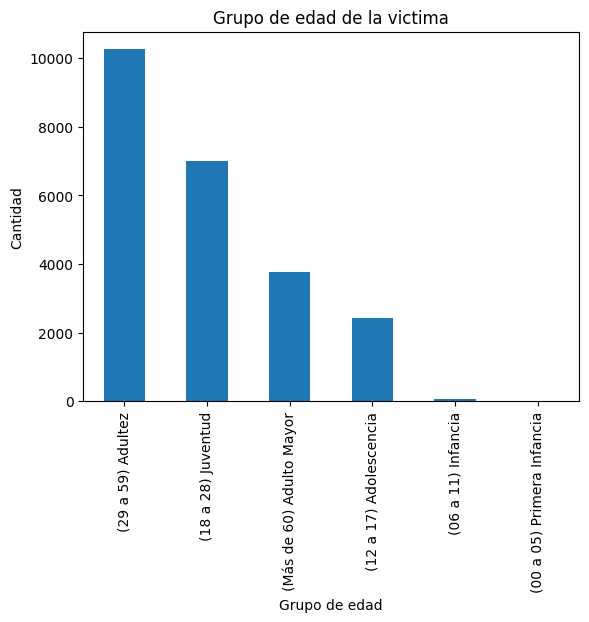

In [27]:
df['Ciclo Vital'].value_counts().plot(kind='bar')
plt.title('Grupo de edad de la victima')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad')
plt.show()


*Detectar en qué grupos de edad el modelo acierta más y en cuáles confunde más.*

Es esencial visualizar la variable objetivo del modelo. Nos ayuda a entender si hay desequilibrio de edades, lo cual impacta en la calidad del modelo predictivo.

### Gráfico 3: Barras apiladas por estado civil

In [ ]:
df['Estado Civil'] = df['Estado Civil'].astype(str)
df['Grupo de edad de la victima'] = df['Grupo de edad de la victima'].astype(str)

In [ ]:
df = df.dropna(subset=['Estado Civil', 'Grupo de edad de la victima'])


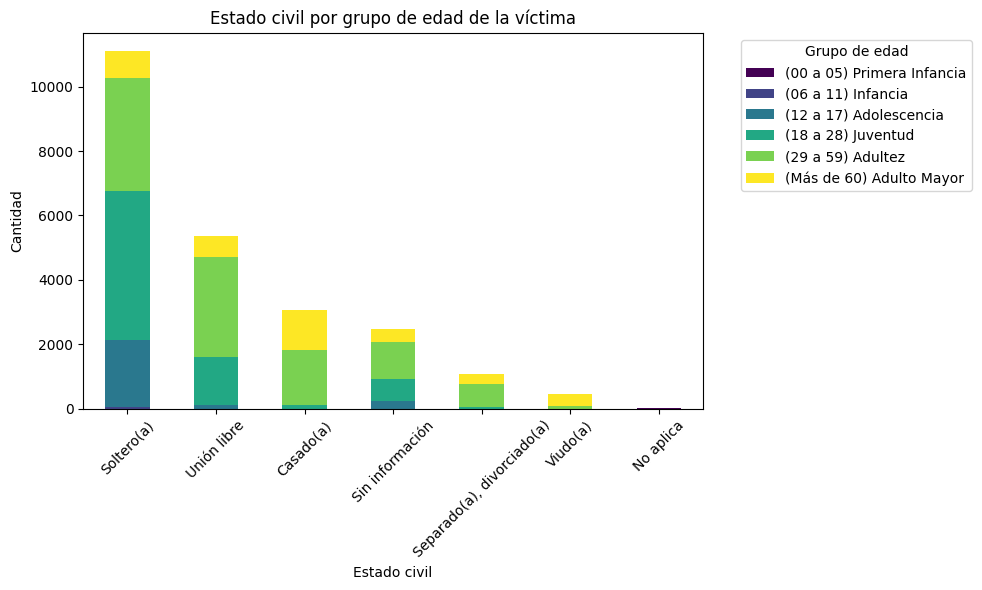

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
df.columns = df.columns.str.strip().str.lower()
tabla = pd.crosstab(df['estado civil'], df['ciclo vital'])
tabla['total'] = tabla.sum(axis=1)
tabla = tabla.sort_values(by='total', ascending=False)
tabla = tabla.drop(columns='total')
ax = tabla.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title('Estado civil por grupo de edad de la víctima')
plt.xlabel('Estado civil')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.legend(title='Grupo de edad', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


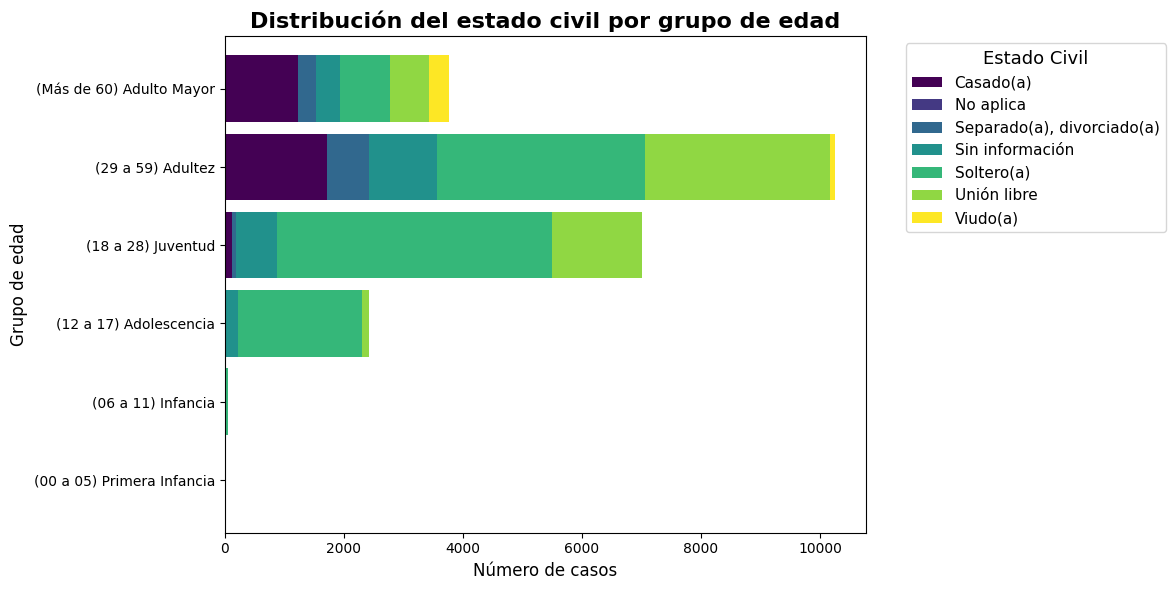

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
df.columns = df.columns.str.strip().str.lower()
tabla = pd.crosstab(df['ciclo vital'], df['estado civil'])
ax = tabla.plot(kind='barh', stacked=True, figsize=(12, 6), colormap='viridis', width=0.85)
plt.title('Distribución del estado civil por grupo de edad', fontsize=16, fontweight='bold')
plt.xlabel('Número de casos', fontsize=12)
plt.ylabel('Grupo de edad', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Estado Civil', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

*Ver qué estados civiles son más frecuentes en cada grupo de edad. Por ejemplo, soltería en jóvenes, unión libre en adultos.*

Ayuda a identificar cómo se relaciona una variable explicativa clave (Estado Civil) con el target. 

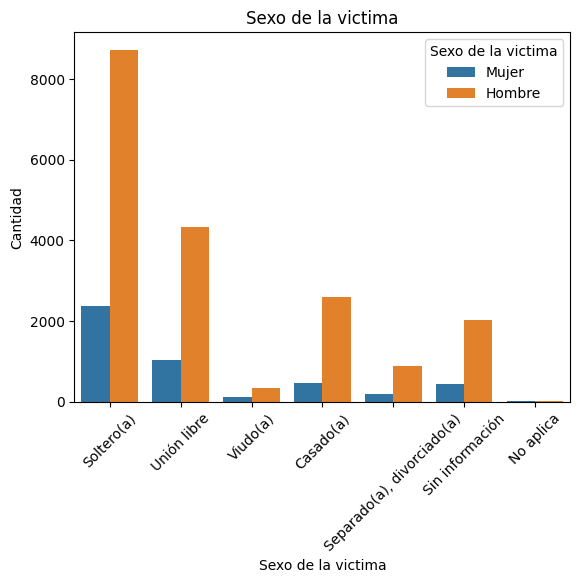

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Estado Civil', hue='Sexo de la victima')
plt.title('Sexo de la victima')
plt.xlabel('Sexo de la victima')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


Ver qué estados civiles son más frecuentes en cada grupo de edad. Por ejemplo, soltería en hombres y en mujeres, seguido por union libre.


Ayuda a identificar cómo se relaciona una variable explicativa clave (Estado Civil) con el target. Además, puede guiar interpretaciones sociales y políticas.